# **Exploratory Data Analysis on Spotify Dataset**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Spotify eda/spotify_data clean.csv")

### Data Cleaning
First , we begin with data preprocessing and making our data ready for analysis.



In [8]:
df.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


In [9]:
df.isna().sum()

,0
track_id,0
track_name,0
track_number,0
track_popularity,0
explicit,0
artist_name,3
artist_popularity,0
artist_followers,0
artist_genres,3361
album_id,0


In [10]:
df[df['artist_genres'].isna()].head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
6,3QoQ3HqXTAjgEl9LbNMbYp,Te Procuro na Cidade,1,20,False,AZERDK,30,1657,NaN,1PpuOsLjPWshDLxkr0oHeU,Te Procuro na Cidade,2025-10-30,1,single,4.12
8,4pZ949nFW5SurwzE0TSe7I,Cupido Vagabundo,1,16,False,Toni dos Anjos,6,475,NaN,60DLQZkzpvDvVfvEC6VOJM,Cupido Vagabundo,2025-10-30,2,single,2.92
10,5mfAZwEr4jAVDnSY0HHuyH,Stray,1,30,False,What Matters The Most,25,814,NaN,0DHsJaaMzbygWosCjYk37t,Stray,2025-10-25,4,single,2.49
12,0NZKfcua68wuZePhjp8N2I,Root of all Evil,5,65,False,Daniel Caesar,85,11137714,NaN,115s3YJqm6iLblABdjtgzQ,Son Of Spergy,2025-10-24,12,album,4.41


In [11]:
df['artist_genres'].fillna('Unknown',inplace=True)
df['artist_name'].fillna('Unknown',inplace=True)

In [12]:
df['artist_genres']=df['artist_genres'].str.split(',')

# Analysis on Tracks
Let's begin our data analysis on the song tracks and find out the valuable insights .



In [13]:
most_popular_tracks = df.sort_values(by='track_popularity', ascending=False)
most_popular_tracks[['track_name','artist_name', 'track_popularity']].head(10)

,track_name,artist_name,track_popularity
457,Golden,HUNTR/X,99
88,Opalite,Taylor Swift,97
101,Elizabeth Taylor,Taylor Swift,95
337,Man I Need,Olivia Dean,95
103,Father Figure,Taylor Swift,94
1134,BIRDS OF A FEATHER,Billie Eilish,94
450,Soda Pop,Saja Boys,94
460,Your Idol,Saja Boys,93
93,Actually Romantic,Taylor Swift,93
97,Wood,Taylor Swift,93


### Top 20 Most Popular Tracks
This bar chart visualizes the top 20 most popular tracks based on their 'track_popularity' score. It highlights individual tracks and their popularity, providing insights into which songs are currently resonating most with listeners.

In [14]:
fig = px.bar(
    most_popular_tracks.head(20),
    x='track_name',
    y='track_popularity',
    title='Top 20 Most Popular Tracks',
    color='track_popularity',
    color_continuous_scale='greens'
)

fig.update_traces(textposition='outside', marker_line_color='#1DB954',
    marker_line_width=1)

fig.update_layout(
    width=1000,
    height=600,
    xaxis_title='Track Name',
    yaxis_title='Track Popularity',
    xaxis_tickangle=-45,
    template='plotly_dark'
)

fig.show()


The following histogram shows the distribution of Song popularity. The graph is left skewed which means that a large majority of songs have higher popularity scores. There is a tall bar concentrated in the lower end of the scale , indicating there are many songs with very low popularity density.

In [15]:
fig = px.histogram(
    df,
    x='track_popularity',
    title='Distribution of Song Popularity',
    color_discrete_sequence=[ '#1DB954']
)

fig.update_layout(
    template='plotly_dark',
    xaxis_title='Song Popularity',
    yaxis_title='Song Count'
)

fig.show()


In [16]:
df['explicit'].value_counts()

,count
explicit,
False,6434
True,2148


### Explicit Vs  Non- explicit Ratio
There are about three times the number of non explicit songs produced in comparison to the explicit songs.


In [17]:
fig=px.pie(df,names='explicit',
           hole=0.4,
           color_discrete_sequence=['#0B3D2E', '#1DB954'],
           title='Explicit vs Non-Explicit Songs')
fig.update_layout(width=1250,height=500,
                  template='plotly_dark',
                  title_font_size=25)
fig.update_traces(
    textinfo='percent+label',
    pull=[0.1,0]
)
fig.show()

### Track duration distribution
When we infer about the statistics of average duration of the songs we find that majority of the songs lies between 2-5 minutes duration with a very thin tail extending to right. The median duration range being somewhere 3.0-4.0 minutes.

In [18]:

fig = px.histogram(
    df,
    x='track_duration_min',
    title='Distribution of Song Durations',
    color_discrete_sequence=[ '#1DB954']
)

fig.update_layout(
    template='plotly_dark',
    xaxis_title='Duration (minutes)',
    yaxis_title='Song Count'
)

fig.show()


 ### Comparision between Explicit and non Explicit songs duration.
 Both explicit (darker green) and non-explicit (lighter green) songs largely follow a similar distribution pattern, with the majority of tracks for both categories falling between approximately 2 to 5 minutes.

In [19]:
fig = px.histogram(
    df,
    x='track_duration_min',
    color='explicit',
    color_discrete_sequence=['#0B3D2E', '#1DB954'],
    barmode='overlay',
    opacity=0.25,
    title='Duration Distribution: Explicit vs Non-Explicit'
)

fig.update_layout(
    template='plotly_dark',
    xaxis_title='Duration (minutes)',
    yaxis_title='Count'
)

fig.show()


Both explicit and non-explicit songs show a similar left-skewed distribution, meaning the majority of songs in both categories have higher popularity scores.

It appears that non-explicit songs (represented by green in the chart) have a slightly higher concentration in the mid-to-high popularity ranges compared to explicit songs (represented by a darker green).

In [20]:
fig = px.histogram(
    df,
    x='track_popularity',
    color='explicit',
    color_discrete_sequence=['#0B4F2E', '#1DB930'],
    barmode='overlay',
    opacity=0.25,
    title='Popularity : Explicit vs Non-Explicit'
)

fig.update_layout(
    template='plotly_dark',
    xaxis_title='Popularity',
    yaxis_title='Count'
)

fig.show()


Correlation between Track Popularity and Duration


 The Pearson correlation coefficient  is approximately 0.106. This indicates a very weak positive linear relationship. In practical terms, this means that while there's a slight tendency for longer songs to have marginally higher popularity, the duration of a song is not a strong predictor of its popularity.

###Scatter Plot Visualization:
The scatter plot titled 'Correlation between Track Popularity and Duration'  visually confirms this weak relationship. You can see points scattered widely, not forming a tight line, which is characteristic of a low correlation. Most songs, regardless of their duration, can have varying popularity.

In [21]:
track_duration_corr = df['track_duration_min'].corr(df['track_popularity'])
print("Correlation between Track Popularity and Duration : ",track_duration_corr)

Correlation between Track Popularity and Duration :  0.10555988708769382


In [22]:
fig = px.scatter(
    df,
    x='track_duration_min',
    y='track_popularity',
    color='track_popularity',
    color_continuous_scale='viridis',
    title='Correlation between Track Popularity and Duration',
    hover_data=['track_name', 'artist_name']
)

fig.update_layout(
    template='plotly_dark',
    xaxis_title='Duration (minutes)',
    yaxis_title='Popularity'
)

fig.show()

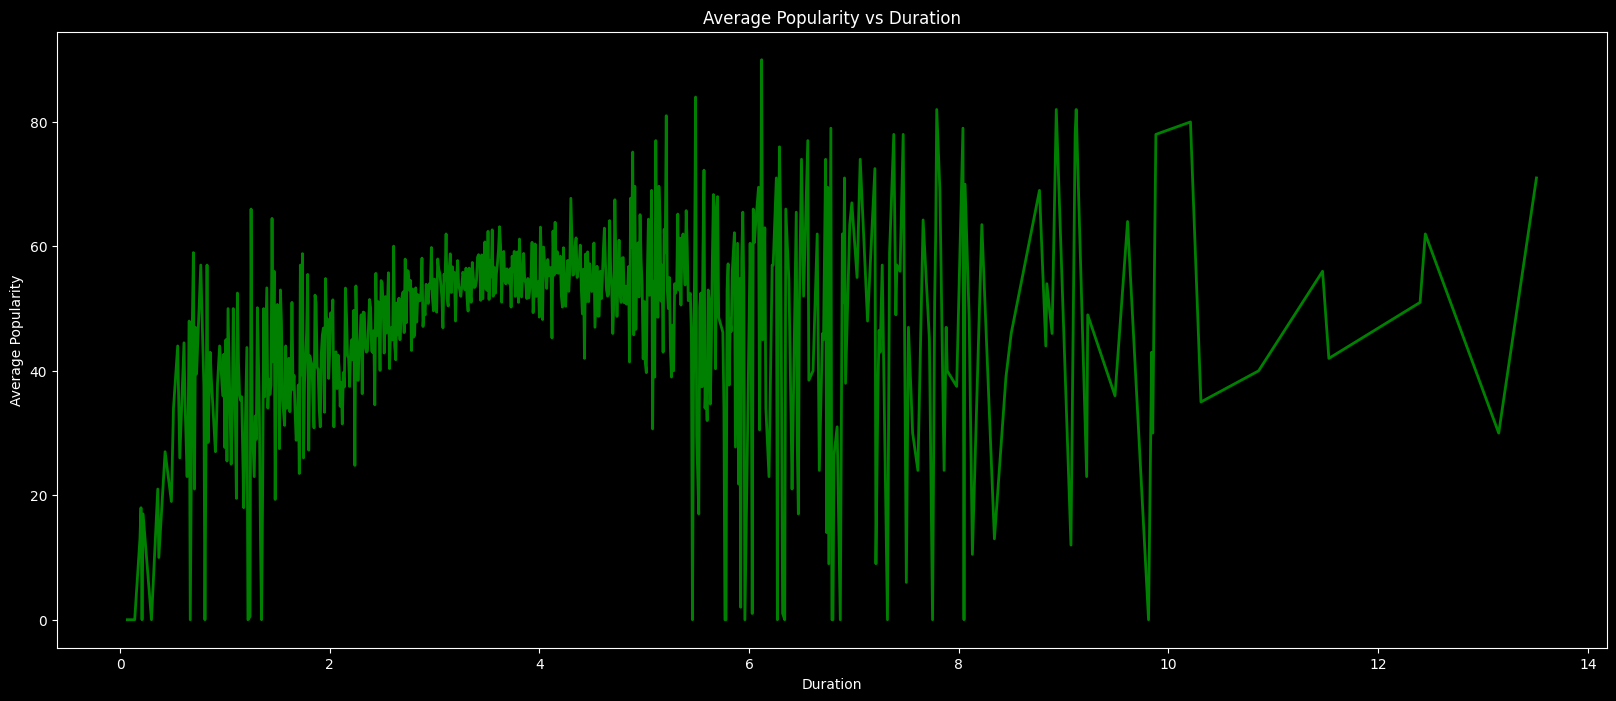

In [47]:
fig, ax = plt.subplots(figsize=(20, 8))

avg_df = df.groupby("track_duration_min")["track_popularity"].mean()

plt.style.use("dark_background")

plt.plot(
    avg_df.index,
    avg_df.values,
    color="green",
    linewidth=2
)

plt.xlabel("Duration")
plt.ylabel("Average Popularity")
plt.title("Average Popularity vs Duration")

plt.show()


In [24]:
df['album_type'].value_counts()

,count
album_type,
album,5856
single,2219
compilation,507


In [25]:
fig=px.pie(
    df,
    names='album_type',
    hole=0.4,
    color_discrete_sequence=['#0B3D2E', '#1DB154', '#1DFF56'],
    title='Distribution of Album Types',
    template='plotly_dark'
)
fig.update_layout(
    width=1250,
    height=500,
    title_font_size=25,
    showlegend=True
)
fig.update_traces(
    textinfo='percent+label',
    pull=[0.1,0.1,0],
    marker=dict(line=dict(color='#1DB954', width=1)),
    hoverinfo='label+percent',
    textposition='outside',
    textfont=dict(size=15),
    insidetextfont=dict(size=15),
    direction='clockwise'
)
fig.show()

In [26]:
df.groupby('album_type')['track_popularity'].mean().sort_values(ascending=False)

,track_popularity
album_type,
album,55.655055
single,46.356467
compilation,40.512821


In [27]:
avg_popularity_by_album_type = df.groupby('album_type')['track_popularity'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(
    avg_popularity_by_album_type,
    x='album_type',
    y='track_popularity',
    color='track_popularity',
    color_continuous_scale='greens',
    title='Average Track Popularity by Album Type',
    labels={
        'album_type': 'Album Type',
        'track_popularity': 'Average Popularity'
    },
    template='plotly_dark'
)

fig.update_layout(
    xaxis_title='Album Type',
    yaxis_title='Average Popularity',
    title_font_size=25
)

fig.show()

In [28]:
fig=px.histogram(
    df,
    x='track_popularity',
    color='album_type',
    color_discrete_sequence=['#0B3D2E', '#1DB954', '#1DB954'],
    barmode='overlay',
    opacity=0.25,
    title='Popularity : Album Type'
)

fig.update_layout(
    template='plotly_dark',
    xaxis_title='Popularity',
    yaxis_title='Count'
)

fig.show(
)

# Artists


In [29]:
tracks=df.groupby('artist_name').count()['track_name'].sort_values(ascending=False)
tracks.head(10)

,track_name
artist_name,
Taylor Swift,324
The Weeknd,141
Lana Del Rey,99
Ariana Grande,94
Nirvana,91
Drake,84
Post Malone,83
The Neighbourhood,77
Lady Gaga,70


In [30]:
df1= tracks.head(20).reset_index()
df1.columns = ['artist', 'num_tracks']

fig = px.bar(
    df1,
    x='artist',
    y='num_tracks',
    color='num_tracks',
    color_continuous_scale='greens'
)

fig.update_layout(
    template='plotly_dark',
    xaxis_title='Artist Name',
    yaxis_title='Number of Tracks',
    title='Number of Tracks by Artist',
    title_font_size=25
)

fig.show()


In [31]:
artist_track_counts = df.groupby('artist_name')['track_name'].count().sort_values(ascending=False)
artists_with_min_tracks = artist_track_counts[artist_track_counts >= 10].index
print(f"Number of artists with at least 10 tracks: {len(artists_with_min_tracks)}")
print("First 5 artists with at least 10 tracks:\n", artists_with_min_tracks[:5])

Number of artists with at least 10 tracks: 152
First 5 artists with at least 10 tracks:
 Index(['Taylor Swift', 'The Weeknd', 'Lana Del Rey', 'Ariana Grande',
       'Nirvana'],
      dtype='object', name='artist_name')


In [32]:
df_filtered_artists = df[df['artist_name'].isin(artists_with_min_tracks)]
avg_popularity_by_artist = df_filtered_artists.groupby('artist_name')['track_popularity'].mean().sort_values(ascending=False)

artists_analysis = pd.DataFrame({
    'avg_popularity': avg_popularity_by_artist,
    'track_count': artist_track_counts[artists_with_min_tracks]
}).reset_index()
artists_analysis.rename(columns={'index': 'artist_name'}, inplace=True)
artists_analysis = artists_analysis.sort_values(by='avg_popularity', ascending=False)


In [33]:
fig = px.bar(
    artists_analysis.head(20),
    x='artist_name',
    y='avg_popularity',
    color='avg_popularity',
    color_continuous_scale='greens',
    title='Top 20 Artists by Average Track Popularity (with at least 10 tracks)',
    hover_data=['track_count']
)

fig.update_layout(
    template='plotly_dark',
    xaxis_title='Artist Name',
    yaxis_title='Average Track Popularity',
    xaxis_tickangle=-45,
    title_font_size=25
)

fig.show()


In [34]:
artist_followers=df.groupby('artist_name')['artist_followers'].mean().sort_values(ascending=False).reset_index()
artist_followers.columns=['artist_names','followers']

fig=px.bar(
    artist_followers.head(20),
    x='artist_names',
    y='followers',
    color='followers',
    color_continuous_scale='greens',
    title='Top 20 Artists by  Followers',
    hover_data=['followers']
)

fig.update_layout(
    template='plotly_dark',
    xaxis_title='Artist Name',
    yaxis_title=' Followers',
    xaxis_tickangle=-45,
    title_font_size=25
)

fig.show()


In [35]:
track_count_threshold = artists_analysis['track_count'].median()
print(f"Median track count threshold: {track_count_threshold}\n")

artists_analysis['track_category'] = artists_analysis['track_count'].apply(lambda x: 'Many Tracks' if x >= track_count_threshold else 'Few Tracks')
print(artists_analysis.head())
print('\n')
avg_popularity_by_category = artists_analysis.groupby('track_category')['avg_popularity'].mean()
print(avg_popularity_by_category)

Median track count threshold: 17.0

           artist_name  avg_popularity  track_count track_category
7       Arctic Monkeys       79.800000           10     Few Tracks
151              sombr       79.666667           15     Few Tracks
122  Sabrina Carpenter       79.500000           34    Many Tracks
134        Tame Impala       75.000000           13     Few Tracks
17       Billie Eilish       73.885246           61    Many Tracks


track_category
Few Tracks     52.956220
Many Tracks    56.107652
Name: avg_popularity, dtype: float64


In [36]:
fig = px.scatter(
    artists_analysis,
    x='track_count',
    y='avg_popularity',
    title='Correlation between Track Count and Average Popularity',
    color='avg_popularity',
    color_continuous_scale='greens',
    labels={
        'track_count': 'Number of Tracks',
        'avg_popularity': 'Average Popularity'
    },
    template='plotly_dark',
    hover_data=['artist_name']
)

fig.show()

In [37]:
print("Descriptive statistics for artists_analysis DataFrame:")
display(artists_analysis.describe())

Descriptive statistics for artists_analysis DataFrame:


,avg_popularity,track_count
count,152.000000,152.000000
mean,54.594136,27.598684
std,12.936204,32.338086
min,20.000000,10.000000
25%,44.942647,12.000000
50%,56.273924,17.000000
75%,65.579244,30.000000
max,79.800000,324.000000


In [38]:
fig = px.bar(
    avg_popularity_by_category.reset_index(),
    x='track_category',
    y='avg_popularity',
    color='track_category',
    color_discrete_sequence=['#1DB954', '#0B3D2E'],
    title='Average Track Popularity by Track Category',
    labels={
        'track_category': 'Track Category',
        'avg_popularity': 'Average Popularity'
    },
    template='plotly_dark'
)

fig.update_layout(
    xaxis_title='Track Category',
    yaxis_title='Average Popularity',
    title_font_size=25
)

fig.show()

# Genre Popularity

In [39]:
genres_exploded = df.explode('artist_genres')

genres_exploded['artist_genres'] = genres_exploded['artist_genres'].str.strip()

genre_counts = genres_exploded['artist_genres'].value_counts()

print("Top 10 Most Popular Genres:\n", genre_counts.head(10))

Top 10 Most Popular Genres:
 artist_genres
Unknown            3361
pop                 920
country             680
soundtrack          450
hip hop             431
indie               376
folk                337
rock                327
rap                 297
alternative pop     228
Name: count, dtype: int64


In [40]:

genre_counts_filtered = genre_counts[genre_counts.index != 'Unknown']

top_10_genres = genre_counts_filtered.head(10).reset_index()
top_10_genres.columns = ['genre', 'count']

fig = px.bar(
    top_10_genres,
    x='genre',
    y='count',
    color='count',
    color_continuous_scale='greens',
    title='Top 10 Most Popular Genres',
    labels={
        'genre': 'Genre',
        'count': 'Number of Tracks'
    },
    template='plotly_dark'
)

fig.update_layout(
    xaxis_tickangle=-45,
    title_font_size=25
)

fig.show()

## Most Popular Albums Overall


In [41]:
album_popularity = df.groupby('album_name')['track_popularity'].mean().sort_values(ascending=False)

fig = px.bar(
    album_popularity.head(10).reset_index(),
    x='album_name',
    y='track_popularity',
    color='track_popularity',
    color_continuous_scale='greens',
    title='Top 10 Albums by Average Track Popularity',
    labels={
        'album_name': 'Album Name',
        'track_popularity': 'Average Popularity'
    },
    template='plotly_dark'
)

fig.update_layout(
    xaxis_tickangle=-45,
    title_font_size=25
)

fig.show()

In [42]:
median_popularity=df['track_popularity'].median()
max_tracks_album = df[df['track_popularity']>=median_popularity].groupby('album_name')['album_total_tracks'].mean().sort_values(ascending=False).head(20)

fig = px.bar(
    max_tracks_album.reset_index(),
    x='album_name',
    y='album_total_tracks',
    color='album_total_tracks',
    color_continuous_scale='greens',
    title='Top 10 Albums by Number of Tracks',
    labels={
        'album_name': 'Album Name',
        'album_total_tracks': 'Total Tracks'
    },
    template='plotly_dark'
)

fig.update_layout(
    xaxis_tickangle=-45,
    title_font_size=25
)

fig.show()

In [43]:
df.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,[moombahton],5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"[country hip hop, southern hip hop]",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,[Unknown],3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,[moombahton],5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,[dark r&b],06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


## Explore Artist Popularity vs. Followers


In [44]:
correlation_artist_metrics = df['artist_followers'].corr(df['artist_popularity'])
print(f"Pearson correlation between Artist Followers and Artist Popularity: {correlation_artist_metrics}")

Pearson correlation between Artist Followers and Artist Popularity: 0.6355790739759636


In [45]:
fig = px.scatter(
    df,
    x='artist_followers',
    y='artist_popularity',
    title='Artist Popularity vs. Artist Followers',
    labels={
        'artist_followers': 'Artist Followers',
        'artist_popularity': 'Artist Popularity'
    },
    color='artist_popularity',
    color_continuous_scale='greens',
    template='plotly_dark',
    hover_data=['artist_name', 'artist_genres']
)

fig.update_layout(
    xaxis_title='Artist Followers',
    yaxis_title='Artist Popularity',
    title_font_size=25
)

fig.show()

## Release Trends Over Time


In [46]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'])


df['release_year'] = df['album_release_date'].dt.year

releases_per_year = df['release_year'].value_counts().sort_index().reset_index()
releases_per_year.columns = ['year', 'num_releases']

fig = px.line(
    releases_per_year,
    x='year',
    y='num_releases',
    title='Number of Releases Over Time',
    labels={
        'year': 'Year',
        'num_releases': 'Number of Releases'
    },
    template='plotly_dark',
  color_discrete_sequence=['#1DB954']
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Releases',
    title_font_size=25
)

fig.show()